# App Classifier

In this project I tried to train and test model feed the scrapped data. The data contains softwares' `Description` and `Labels` of a particular software.

It is an `Multi Label` project. So each description contains more than one label.


Almost 17000 data has been collected for this project.

**Model**

For the model, I used `pytorch` and `HuggingFace` built in models to get better accuracy. 

# Install and set up libraries.

In [1]:
! pip install -q transformers[sentencepiece] fastbook fastai ohmeow-blurr onnxruntime onnx nbdev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 34.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 KB 32.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 KB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 93.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 46.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.8/64.8 KB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 96.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 57.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 KB 39.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 KB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 KB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import torch
from transformers import *
from fastai.text.all import *
from blurr.text.data.all import *
from blurr.text.modeling.all import *
from onnxruntime.quantization import quantize_dynamic, QuantType


/usr/local/lib/python3.8/dist-packages/transformers/generation_utils.py:24: FutureWarning: Importing `GenerationMixin` from `src/transformers/generation_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import GenerationMixin` instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/transformers/generation_tf_utils.py:24: FutureWarning: Importing `TFGenerationMixin` from `src/transformers/generation_tf_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import TFGenerationMixin` instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/blurr/text/modeling/question_answering.py:31: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  squad_metric = load_metric("squad")


# EDA and Data Wrangling


In [4]:
data = pd.read_csv('data/final_data.csv')
data.head()

,Description,Category
0,"KeePass Password Safe is a free, open source, lightweight, and easy-to-use password manager for Windows, Linux and Mac OS X, with ports for Android, iPhone/iPad and other mobile devices. With so many passwords to remember and the need to vary passwords to protect your valuable data, it’s nice to have KeePass to manage your passwords in a secure way. KeePass puts all your passwords in a highly encrypted database and locks them with one master key or a key file. As a result, you only have to remember one single master password or select the key file to unlock the whole database. And the data...","Categories\nOffice/Business, Database, Security, Desktop Environment, Internet, Password Generators"
1,"XAMPP is a very easy to install Apache Distribution for Linux, Solaris, Windows, and Mac OS X. The package includes the Apache web server, MySQL, PHP, Perl, a FTP server and phpMyAdmin.XAMPP is a very easy to install Apache Distribution for Linux, Solaris, Windows, and Mac OS X. The package includes the Apache web server, MySQL, PHP, Perl, a FTP server and phpMyAdmin.","Categories\nDatabase Engines/Servers, Dynamic Content, Site Management, HTTP Servers"
2,"Technical analysis library with indicators like ADX, MACD, RSI, Stochastic, TRIX... includes also candlestick pattern recognition. Useful for trading application developpers using either Excel, .NET, Mono, Java, Perl or C/C++.Technical analysis library with indicators like ADX, MACD, RSI, Stochastic, TRIX... includes also candlestick pattern recognition. Useful for trading application developpers using either Excel, .NET, Mono, Java, Perl or C/C++.","Categories\nInvestment Management, Spreadsheet, Front-Ends, Algorithms, Information Analysis"
3,AppServ is an merging open source software installer package for Windows and Linux.AppServ is an merging open source software installer package for Windows and Linux.,"Categories\nDatabase Engines/Servers, Site Management, HTTP Servers"
4,"LibreOffice is a free and powerful office suite, and a successor to OpenOffice. Its clean interface and feature-rich tools help you unleash your creativity and enhance your productivity.\n\nLibreOffice is Free and Open Source Software (FOSS) – development is open to new talent and new ideas, and our software is tested and used daily by a large and devoted user community. Your documents will look professional and clean, regardless of their purpose: a letter, a master thesis, a brochure, financial reports, marketing presentations, technical drawings and diagrams. LibreOffice makes your work ...","Categories\nWord Processors, Office Suites, Front-Ends"


In [5]:
data.shape

(33770, 2)

In [6]:
data = data.dropna()
data.shape

(33768, 2)

In [7]:
data['Category'] = data['Category'].apply(lambda x: x.split('\n')[1])

In [8]:
data.head()

,Description,Category
0,"KeePass Password Safe is a free, open source, lightweight, and easy-to-use password manager for Windows, Linux and Mac OS X, with ports for Android, iPhone/iPad and other mobile devices. With so many passwords to remember and the need to vary passwords to protect your valuable data, it’s nice to have KeePass to manage your passwords in a secure way. KeePass puts all your passwords in a highly encrypted database and locks them with one master key or a key file. As a result, you only have to remember one single master password or select the key file to unlock the whole database. And the data...","Office/Business, Database, Security, Desktop Environment, Internet, Password Generators"
1,"XAMPP is a very easy to install Apache Distribution for Linux, Solaris, Windows, and Mac OS X. The package includes the Apache web server, MySQL, PHP, Perl, a FTP server and phpMyAdmin.XAMPP is a very easy to install Apache Distribution for Linux, Solaris, Windows, and Mac OS X. The package includes the Apache web server, MySQL, PHP, Perl, a FTP server and phpMyAdmin.","Database Engines/Servers, Dynamic Content, Site Management, HTTP Servers"
2,"Technical analysis library with indicators like ADX, MACD, RSI, Stochastic, TRIX... includes also candlestick pattern recognition. Useful for trading application developpers using either Excel, .NET, Mono, Java, Perl or C/C++.Technical analysis library with indicators like ADX, MACD, RSI, Stochastic, TRIX... includes also candlestick pattern recognition. Useful for trading application developpers using either Excel, .NET, Mono, Java, Perl or C/C++.","Investment Management, Spreadsheet, Front-Ends, Algorithms, Information Analysis"
3,AppServ is an merging open source software installer package for Windows and Linux.AppServ is an merging open source software installer package for Windows and Linux.,"Database Engines/Servers, Site Management, HTTP Servers"
4,"LibreOffice is a free and powerful office suite, and a successor to OpenOffice. Its clean interface and feature-rich tools help you unleash your creativity and enhance your productivity.\n\nLibreOffice is Free and Open Source Software (FOSS) – development is open to new talent and new ideas, and our software is tested and used daily by a large and devoted user community. Your documents will look professional and clean, regardless of their purpose: a letter, a master thesis, a brochure, financial reports, marketing presentations, technical drawings and diagrams. LibreOffice makes your work ...","Word Processors, Office Suites, Front-Ends"


## Findings Important categories and convert into numerical categories.

In [9]:
table = {}
for val in data['Category'].values.tolist():
  for i in val.split(', '):
    if i in table.keys():
      table[i] += 1
    else:
      table[i] = 1

In [10]:
table

{'Office/Business': 904,
 'Database': 1252,
 'Security': 1636,
 'Desktop Environment': 1412,
 'Internet': 1158,
 'Password Generators': 108,
 'Database Engines/Servers': 398,
 'Dynamic Content': 1186,
 'Site Management': 576,
 'HTTP Servers': 258,
 'Investment Management': 70,
 'Spreadsheet': 72,
 'Front-Ends': 1092,
 'Algorithms': 222,
 'Information Analysis': 392,
 'Word Processors': 332,
 'Office Suites': 280,
 'SQL Clients': 30,
 'Database Clients': 26,
 'Search Engines': 302,
 'Frameworks': 790,
 'Scientific/Engineering': 572,
 'Object-Relational Mapping (ORM)': 48,
 'Intelligent Agents': 98,
 'Web Development': 38,
 'Board Games': 190,
 'Turn Based Strategy': 188,
 'Performance Testing': 22,
 'Load Balancers': 44,
 'LDAP': 54,
 'Libraries': 642,
 'Penetration Testing': 88,
 'Data Formats': 998,
 'Systems Administration': 760,
 'Bio-Informatics': 296,
 'Medical': 222,
 'Pharmacy': 30,
 'Software Development': 1718,
 'Software Testing': 262,
 'Enterprise': 428,
 'File Sync': 104,
 

In [11]:
(len(table))

500

In [13]:
labels = list(table.keys())
counts = list(table.values())

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


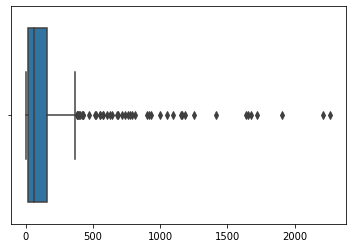

In [24]:
sns.boxplot(counts)
plt.show()

In [25]:
another_table={}
for i in table.items():
  if i[1] > 20:
    another_table[i[0]] = i[1]

In [26]:
len(another_table)

361

In [27]:
cat_list = list(another_table.keys())
# cat_list

In [28]:
import json
with open('/content/drive/MyDrive/nlp/app/data.json', 'w') as f:
    json.dump(cat_list, f)

In [29]:
def selected(x):
  cat =[]
  for i in x.split(', '):
    if i in cat_list:
      cat.append(i)
  return cat

In [30]:
data['selected_categories'] = data['Category'].apply(lambda x: selected(x))

In [31]:
data.head()

,Description,Category,selected_categories
0,"KeePass Password Safe is a free, open source, lightweight, and easy-to-use password manager for Windows, Linux and Mac OS X, with ports for Android, iPhone/iPad and other mobile devices. With so many passwords to remember and the need to vary passwords to protect your valuable data, it’s nice to have KeePass to manage your passwords in a secure way. KeePass puts all your passwords in a highly encrypted database and locks them with one master key or a key file. As a result, you only have to remember one single master password or select the key file to unlock the whole database. And the data...","Office/Business, Database, Security, Desktop Environment, Internet, Password Generators","[Office/Business, Database, Security, Desktop Environment, Internet, Password Generators]"
1,"XAMPP is a very easy to install Apache Distribution for Linux, Solaris, Windows, and Mac OS X. The package includes the Apache web server, MySQL, PHP, Perl, a FTP server and phpMyAdmin.XAMPP is a very easy to install Apache Distribution for Linux, Solaris, Windows, and Mac OS X. The package includes the Apache web server, MySQL, PHP, Perl, a FTP server and phpMyAdmin.","Database Engines/Servers, Dynamic Content, Site Management, HTTP Servers","[Database Engines/Servers, Dynamic Content, Site Management, HTTP Servers]"
2,"Technical analysis library with indicators like ADX, MACD, RSI, Stochastic, TRIX... includes also candlestick pattern recognition. Useful for trading application developpers using either Excel, .NET, Mono, Java, Perl or C/C++.Technical analysis library with indicators like ADX, MACD, RSI, Stochastic, TRIX... includes also candlestick pattern recognition. Useful for trading application developpers using either Excel, .NET, Mono, Java, Perl or C/C++.","Investment Management, Spreadsheet, Front-Ends, Algorithms, Information Analysis","[Investment Management, Spreadsheet, Front-Ends, Algorithms, Information Analysis]"
3,AppServ is an merging open source software installer package for Windows and Linux.AppServ is an merging open source software installer package for Windows and Linux.,"Database Engines/Servers, Site Management, HTTP Servers","[Database Engines/Servers, Site Management, HTTP Servers]"
4,"LibreOffice is a free and powerful office suite, and a successor to OpenOffice. Its clean interface and feature-rich tools help you unleash your creativity and enhance your productivity.\n\nLibreOffice is Free and Open Source Software (FOSS) – development is open to new talent and new ideas, and our software is tested and used daily by a large and devoted user community. Your documents will look professional and clean, regardless of their purpose: a letter, a master thesis, a brochure, financial reports, marketing presentations, technical drawings and diagrams. LibreOffice makes your work ...","Word Processors, Office Suites, Front-Ends","[Word Processors, Office Suites, Front-Ends]"


In [32]:
def label(x):
  cat_label = [0]*len(cat_list)
  for i in x:
    ind = cat_list.index(i)
    cat_label[ind] = 1

  return cat_label

In [33]:
data['cat_label']  = data['selected_categories'].apply(lambda x: label(x))

In [34]:
len(cat_list)

361

In [35]:
data['len'] = data['selected_categories'].apply(lambda x: len(x))


In [36]:
data[data['len'] > 5]

,Description,Category,selected_categories,cat_label,len
0,"KeePass Password Safe is a free, open source, lightweight, and easy-to-use password manager for Windows, Linux and Mac OS X, with ports for Android, iPhone/iPad and other mobile devices. With so many passwords to remember and the need to vary passwords to protect your valuable data, it’s nice to have KeePass to manage your passwords in a secure way. KeePass puts all your passwords in a highly encrypted database and locks them with one master key or a key file. As a result, you only have to remember one single master password or select the key file to unlock the whole database. And the data...","Office/Business, Database, Security, Desktop Environment, Internet, Password Generators","[Office/Business, Database, Security, Desktop Environment, Internet, Password Generators]","[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]",6
47,"MailArchiva is a powerful, full featured email archiving (email archiver) and compliance solution for mail systems such as Microsoft Exchange. It stores all incoming, outgoing and internal emails for long term storage. A web based user interface is availMailArchiva is a powerful, full featured email archiving (email archiver) and compliance solution for mail systems such as Microsoft Exchange. It stores all incoming, outgoing and internal emails for long term storage. A web based user interface is avail","Email Spam Filter, Mail Transfer Agents, Enterprise, Data Warehousing, Database, Security","[Email Spam Filter, Mail Transfer Agents, Enterprise, Data Warehousing, Database, Security]","[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]",6
61,"The Object-Role Modeling (ORM) standard version 2, associated schemas and generation tools, and a reference implementation in the form of the Natural Object-Role Modeling Architect for Visual Studio (NORMA) product.The Object-Role Modeling (ORM) standard version 2, associated schemas and generation tools, and a reference implementation in the form of the Natural Object-Role Modeling Architect for Visual Studio (NORMA) product.","XML, Database, UML, Code Generators, Computer-Aided Software Engineering (CASE), Design","[XML, Database, UML, Code Generators, Computer-Aided Software Engineering (CASE), Design]","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]",6
71,"Server bundle of : Apache2 , MySQL , PostgreSQL , OpenSSL , Xmail , SlimFTPd\nSoftware developing triad of : PHP , Perl and Python\n+ Apache2TriadCP , PHPmyadmin , PHPPgAdmin , AWStats , UebiMiau , PHPXMail , PHPSFTPd.\nAll latest stables , all manualsServer bundle of : Apache2 , MySQL , PostgreSQL , OpenSSL , Xmail , SlimFTPd\nSoftware developing triad of : PHP , Perl and Python\n+ Apache2TriadCP , PHPmyadmin , PHPPgAdmin , AWStats , UebiMiau , PHPXMail , PHPSFTPd.\nAll latest stables , all manuals","Email, Database, File Transfer Protocol (FTP), Site Management, HTTP Servers, Interpreters, Email Servers","[Email, Database, File Transfer Protocol (FTP), Site Management, HTTP Servers, Interpreters, Email Servers]","[0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [44]:
data = data.drop(data[(data['len']==1) & (data['len']==0)].index,axis = 0)

In [45]:
data.shape

(33634, 5)

# Train model using preprocessed data

In [47]:
model_name ='distilroberta-base' #"bertabaporu-large" #  bs 2
model_cls = AutoModelForSequenceClassification
config = AutoConfig.from_pretrained(model_name)
config.num_labels = len(cat_list)

hf_arch, hf_config, hf_tokenizer, hf_model = get_hf_objects(model_name, model_cls=model_cls, config=config)
hf_model.config.problem_type = "multi_label_classification"

In [48]:
blocks = (TextBlock(hf_arch, hf_config, hf_tokenizer, hf_model), MultiCategoryBlock(encoded=True,vocab=cat_list))
dblock = DataBlock(blocks=blocks, get_x=ColReader('Description'), get_y=ColReader('cat_label'), splitter=RandomSplitter(valid_pct=0.2, seed=42))

In [49]:
dls = dblock.dataloaders(data, bs=32)

In [50]:
dls.show_batch(dataloaders=dls, max_n=5)

,text,target
0,"---\n--- Luntu - сборка Ubuntu LXDE AppPack\n---\n\nСИСТЕМНЫЕ ТРЕБОВАНИЯ\nМесто на диске: 10 Гб\nОперативная память: 512 Мб\n(для работы в интернете от 1 Гб)\n\nЭта сборка создана для личного использования, если вам она пригодиться и понравится буду рад. Ее создание было обосновано отказом Lubuntu использовать LXDE, которая мне приходится по вкусу.\nВ названиях файлов указаны архитектура сборки (i386, amd64) и номер, соответствующий номеру версии Ubuntu (18 - bionic, 20 - focal).\nВ Luntu используется консольный установщик системы (самопи","[Desktop Environment, OS distribution, Live CD]"
1,"전자문서 유통 클라이언트 기술규격(v2.0)을 만족하는 유통 클라이언트 API 구현 프로젝트입니다. 이 프로젝트의 결과물을 이용하여 유통 메시징 서버(#메일 서버)의 클라이언트를 제작할 수 있는데 본 프로젝트에서는 클라이언트 API를 이용하여 안드로이드 용 앱을 구현하여 공개합니다.\n\n클라이언트 API는 ecc-open-sdk이며, 안드로이드 용 앱은 오픈 #메일입니다. 구글플레이에서 ""오픈 #메일""을 검색하세요.\n\nTwitter : https://twitter.com/OpenSharpMail\nFacebook : https://www.facebook.com/OpenSharpMail전자문서 유통 클�",[Communications]
2,"English Vietnamese Translator and Dictionary\n# Translate Text from Word, PDF, Website...\n# Translate Text from Images, Videos, Programs...\n\nPhần mềm dịch tiếng Anh - tiếng Việt miễn phí. Bạn có thể dịch trực tiếp văn bản trên website bất kỳ, hoặc nhập văn bản cần dịch. Để kết quả dịch được chính xác, bạn nên dịch theo cụm từ hoặc từng câu. Bạn chỉ cần nhấn đúp chuột vào một từ hoặc dùng chuột để đánh dấu một đoạn văn bản khi đang lướt web để thấy kết quả dịch. Phần mềm có thể dịch tiếng Anh sáng tiếng Việt hoặc tiếng Việt sang tiếng Anh.\nYêu cầu: cài đặt.Net Framework 4.5.2 trở lên\nWebsite: https://vikitranslator.comEnglish Vietnamese Translator and Dictionary\n# Translate Text from Word, PDF, Website...\n# Translate Text from Images, Videos, Programs...\n\nPhần mềm d�","[Languages, Dictionary, Computer Aided Translation (CAT)]"
3,"Cooking - це додаток, який дозволить поділитись рецептами із іншими користувачами або переглянути рецепти інших користувачів. Простий та інтуїтивний інтерфейс. Cooking teams збільшується що дня. В близькому майбутньому планується багато планів, які покращать роботу додатка, будуть додані нові функції. Залишайтесь з нами.\n\nПереходим на Play Market, https://play.google.com/store/apps/details?id=com.frusty.cooking&hl=uk&gl=USCooking - це додаток, який дозволить поділитись рецептами із іншими користувачами або переглянути реце",[Mobile]
4,Welcome to the world of Android programming!\n\nDevelop Native Android applications with Delphi XE5/XE6/XE7\n\nSome components:\n+ Added TDPFJAlertDialog\n+ TDPFJAnalogClock\n+ TDPFJButton\n+ TDPFJCheckBox\n+ TDPFJChronometer\n+ TDPFJDatePicker\n+ TDPFJDatePickerDialog\n+ TDPFJEditText\n+ TDPFJImageView\n+ TDPFJListView (not completed)\n+ TDPFJProgressBar\n+ TDPFJProgressDialog\n+ TDPFJTextView\n+ TDPFJTimePickerDialog\n+ TDPFJToast\n+ TDPFJView\n+ TDPFJRadioButton\n+ TDPFJNumberPicker\n+ TDPFJSeekBar\n+ TDPFJTabHost Component (Tabbed view)\n+ TDPFJSpinner Component (Dropdown list)\n+ TDPFJTextSwitcher Component (Fade/Slide Texts)\n+ TDPFJTextClock\n+ TDPFJWebView\n\nFollow me:\nhttps://www.facebook.com/babak.yaghoobii\nhttps://www.linkedin.com/in/babakyaghoobi\nhttps://plus.google.com/+BabakYaghoobii\nhttp://babakyaghoobi.blogspot.com\nhttps://stackoverflow.com/users/4557781/babak-yaghoobi\nhttps://www.colatform.com/en/\n\nEnjoy AndWelcome to the world of Android programming!\n\nDevelop Native Android applications with Delphi XE5/XE6/XE7\n\nSome components:\n+ Added TDPFJAlertDialog\n+ TDPFJAnalogClock\n+ TDPFJButton\n+ TDPFJCheckBox\n+ TDPFJChronometer\n+ TDPFJDatePicker\n+ TDPFJDatePickerDialog\n+ TDPFJEditText\n+ TDPFJImageView\n+ TDPFJListView (not completed)\n+ TDPFJProgressBar\n+ TDPFJProgressDialog\n+,"[Frameworks, Libraries, Mobile]"


In [51]:
model = BaseModelWrapper(hf_model)
 
acc_02 = partial(accuracy_multi, thresh=0.2)

learner = Learner(dls, 
                  model,
                  loss_func=BCEWithLogitsLossFlat(),
                  metrics=[acc_02],
                  cbs=[BaseModelCallback],
                  splitter=blurr_splitter
                  ).to_fp16()

In [52]:
learner.freeze()

SuggestedLRs(slide=0.02290867641568184, valley=0.0003981071640737355)

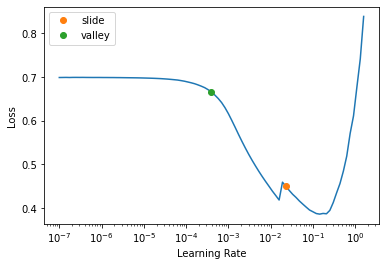

In [53]:
learner.lr_find(suggest_funcs=[slide, valley])

In [54]:
learner.fit_one_cycle(2,slice(0.0003981071640737355,0.02290867641568184))

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.027794,0.025587,0.993194,02:11
1,0.021459,0.020030,0.992909,02:08


In [55]:
learner.unfreeze()

SuggestedLRs(slide=6.30957365501672e-05, valley=1.2022644114040304e-05)

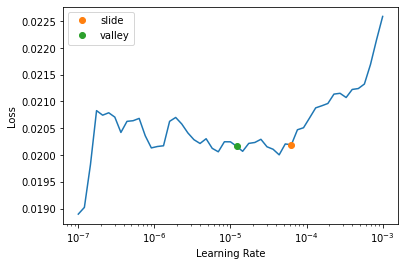

In [56]:
learner.lr_find(suggest_funcs=[slide, valley])

In [57]:

learner.fit_one_cycle(3,slice(6.30957365501672e-05,1.2022644114040304e-05))
     

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.019894,0.019289,0.993377,03:03
1,0.017784,0.017469,0.993839,02:51
2,0.015815,0.016941,0.993630,02:54


In [59]:
learner.export("model/distilroberta-base.pkl")

In [63]:
model = load_learner('model/distilroberta-base.pkl')

# Convert trained model into onnx


In [64]:
classifier = model.model.hf_model.eval()
torch.onnx.export(
    classifier, 
    torch.LongTensor([[0] * 512]),
    'model/classifier.onnx',
    input_names=['input_ids'],
    output_names=['output'],
    opset_version=13,
    dynamic_axes={
        'input_ids': {0: 'batch_size', 1: 'sequence_len'},
        'output': {0: 'batch_size'}
    }
)


In [65]:
onnx_model_path = 'model/classifier.onnx'
quantized_onnx_model_path = 'model/classifier-quantized.onnx'

quantize_dynamic(
    onnx_model_path,
    quantized_onnx_model_path,
    weight_type=QuantType.QUInt8,
)

Ignore MatMul due to non constant B: /[/roberta/encoder/layer.0/attention/self/MatMul]
Ignore MatMul due to non constant B: /[/roberta/encoder/layer.0/attention/self/MatMul_1]
Ignore MatMul due to non constant B: /[/roberta/encoder/layer.1/attention/self/MatMul]
Ignore MatMul due to non constant B: /[/roberta/encoder/layer.1/attention/self/MatMul_1]
Ignore MatMul due to non constant B: /[/roberta/encoder/layer.2/attention/self/MatMul]
Ignore MatMul due to non constant B: /[/roberta/encoder/layer.2/attention/self/MatMul_1]
Ignore MatMul due to non constant B: /[/roberta/encoder/layer.3/attention/self/MatMul]
Ignore MatMul due to non constant B: /[/roberta/encoder/layer.3/attention/self/MatMul_1]
Ignore MatMul due to non constant B: /[/roberta/encoder/layer.4/attention/self/MatMul]
Ignore MatMul due to non constant B: /[/roberta/encoder/layer.4/attention/self/MatMul_1]
Ignore MatMul due to non constant B: /[/roberta/encoder/layer.5/attention/self/MatMul]
Ignore MatMul due to non constant